# Organizando uma eleição
(créditos ao professor Rafael)

O último ano foi extremamente desafiador para você. Além de estarmos vivendo uma pandemia que aumentou nossa preocupação com a nossa própria vida e com nossos entes queridos e estarmos obrigados a passar mais tempo em casa para garantir nossa segurança, você se matriculou em um curso de programação e ciência de dados para mudar de rumo em sua carreira!

O _timing_ pareceu ideal: mais tempo em casa, mais tempo para estudar. Porém, você esbarrou em algumas dificuldades. O condomínio está em reforma, e você passa o dia ao som de marretadas no piso. Durante a noite, no horário da sua aula online, seus vizinhos - um casal passando por dificuldades na relação - costumam discutir em voz alta. A discussão deles frequentemente acorda o bebê do outro vizinho e todos os cachorros do andar no prédio. Deixar para estudar no final de semana não ajuda, pois o filho adolescente da família do apartamento logo acima do seu costuma trazer os colegas de banda para ensaiar. 

A situação se tornou insustentável, e o síndico - que é o mesmo senhorzinho desde que você se mudou para esse condomínio, há mais de 10 anos - não toma atitudes e não gosta de ser perturbado. Chegou a hora de organizar uma eleição para um novo síndico, e você tomou a iniciativa de montar um sistema eletrônico para auxiliar na votação.

## Entidades envolvidas

Podemos imaginar as seguintes entidades envolvidas na eleição:

* **Morador**: representa cada uma das pessoas que moram no prédio. Possui um nome, um Apartamento e é capaz de depositar um voto em um Candidato em uma Urna.
* **Candidato**: é um tipo especial de Morador. Possui tudo o que o morador possui, mas também possui um número que será usado para representá-lo na Urna e uma contagem individual de votos.
* **Apartamento**: representa cada uma das unidades do prédio. Possui uma lista de moradores e um status indicando se ele já votou ou não. Cada apartamento tem direito a exatamente 1 voto. Se a sua filha já votou, você não pode mais votar!
* **Urna**: coleciona votos. Ela possui uma coleção de candidatos e uma coleção de moradores (lembrando que o candidato também conta como morador!). Ela armazena a quantidade de votos de cada candidato e é capaz de incrementar essa quantidade ao receber um voto novo. Ela também possui uma coleção de apartamentos e é capaz de determinar quais apartamentos já votaram (mas não qual apartamento votou em cada candidato - o voto é secreto). Quando o último apartamento votar, ela publica os resultados e declara o vencedor.

Vamos pensar juntos em meios de implementar cada uma das classes.

### Morador

A classe mais básica de nossa eleição, representando cada uma das pessoas que habitam no condomínio. O morador obrigatoriamente possui um nome e um Apartamento.

Seu construtor pode ou não receber uma string contendo o nome, e pode ou não receber um objeto Apartamento. Caso ele não receba um nome, deverá solicitar a digitação de um através do input. Caso ele não receba um objeto Apartamento, deverá pedir por input o número do apartamento e criar o objeto.

O nome e apartamento digitados ou recebidos deverão se tornar atributos do objeto.

Nosso objeto também deverá possuir um método para votar. Ele deverá receber um objeto Urna e pode receber um número inteiro correspondente ao número de um candidato ou, caso não receba, irá ler o número pelo teclado. Ela deverá primeiro verificar se o seu apartamento já votou, e caso não tenha, ela irá chamar o método de acrescentar voto na Urna, informando o número de seu candidato e passando seu objeto apartamento. Caso contrário, ela exibirá uma mensagem alertando que esse apartamento já votou.

In [1]:
class Morador:
    def __init__(self, nome, apto):
        '''
        Cria o morador:

        Parâmetros:
        -----------
        nome = str
            Nome do morador
        apto = int
            Número do apartamento
        '''
        self.nome = nome
        self.apto = apto
    
    def __repr__(self):
        return self.nome

### Candidato

Objetos da classe Candidato são, necessariamente, moradores. Eles possuem as mesmas informações e as mesmas ações que um morador. O que isso significa em programação orientada a objeto?

Ele possui outros dois atributos: o seu número que será usado para identificá-lo na Urna e sua contagem de votos. Ambos devem ser inicializados com valor 0. 

Ele deve oferecer métodos para que seu número seja configurado (quando cadastrarmos o candidato na Urna, ela irá fornecer um número para ele), bem como para que sua contagem de votos seja atualizada (ao final da votação, a Urna irá atualizar a contagem de todos os candidatos).

In [2]:
class Candidato(Morador):
    def __init__(self, nome, apto, num_candidato=0):
        '''
        Cria o candidato
        
        Parâmetros:
        -----------
        
        nome: str
            Nome do candidato
        apto = int
            Número do apartamento 
        '''
        super().__init__(nome, apto)
        self.num_candidato = num_candidato
        self.qtd_votos = 0
        
    def __repr__(self):
        return self.nome

### Apartamento

Objetos da classe Apartamento irão agregar objetos Morador. Isso significa que um de seus atributos será uma lista de moradores. Quando um Apartamento é criado, sua lista começará vazia. O Apartamento deve oferecer métodos para adicionar moradores novos (recebe um objeto Morador e adiciona à lista) e para visualizar seus moradores.

Cada apartamento tem direito a exatamente um voto na eleição para síndico. Portanto, cada objeto também deve ter um atributo indicando se aquele apartamento já votou ou não. A classe deve fornecer meios para que a esse atributo possa ser atualizado, pois quando um morador votar, a urna irá alterar esse atributo registrando que o apartamento já votou.

In [3]:
class Apartamento():
    def __init__(self, num_apto):
        '''
        Cria o apartamento
        
        Parâmetros:
        -----------
        num_apto: str
            Número do apartamento        
        '''
        self.num_apto = num_apto
        self.lista_moradores = []
        self.votou = 0
        
    def __repr__(self):
        return self.num_apto
        
    def __str__(self):
        return self.num_apto
    
    def adicionar_morador(self, morador):
        '''
        Adiciona o morador na lista de moradores do apartamento
        
        Parâmetros:
        -----------
        morador: objeto
            Objeto da classe Morador
        '''
        if morador not in self.lista_moradores:
            self.lista_moradores.append(morador)
   
    def visualizar_moradores(self):
        '''
        Visualiza os moradores do apartamento
        '''
        for morador in self.lista_moradores:
            print(morador.nome)

### Urna
A classe mais complexa do projeto. Ela é responsável por boa parte da lógica da nossa eleição.

Seu construtor deverá criar como atributos uma coleção de apartamentos e outra de candidatos - escolha a estrutura de dados que julgar mais adequada.

A classe deve fornecer métodos que permitam o cadastro de apartamentos (recebendo como parâmetro objetos Apartamento já existentes) e candidatos (idem). Ao receber um candidato para cadastro, ela deverá gerar um número **único** para representar esse candidato na eleição e irá ajustar esse atributo diretamente no objeto candidato.

Ela também deve ter um método para receber um voto, que deve receber um objeto apartamento e o número de um candidato. Ela deve atualizar a contagem de voto do candidato cujo número foi recebido, e marcar aquele apartamento como já votado. Se o apartamento que votou era o último que ainda podia votar, a urna deve imediatamente imprimir os resultados.

Bole uma maneira que a urna possa sinalizar para o programa principal se ela já encerrou a votação ou não.

In [4]:
class Urna(Candidato):
    def __init__(self):
        '''
        Cria a urna
        '''
        self.moradores = {}
        self.aptos = {}
        self.candidatos = {}
        
    def cadastrar_morador(self, morador):
        '''
        Insere o morador no dicionário 'moradores'
        
        Parâmetros:
        -----------
        morador: objeto
            Objeto da classe Morador
        '''
        self.moradores[morador.nome] = morador
        
    def cadastrar_apto(self, apto):
        '''
        Insere o apartamento no dicionário 'aptos'
        
        Parâmetros:
        -----------
        apto: objeto
            Objeto da classe Apartamento
        '''
        self.aptos[str(apto)] = apto
    
    def cadastrar_candidato(self, candidato):
        '''
        Insere o candidato no dicionário 'candidatos'
        
        Parâmetros:
        -----------
        candidato: objeto
            Objeto da classe Candidato
        '''
        self.candidatos[candidato.num_candidato] = candidato
        
    def atribuir_voto(self, apartamento, num_candidato):
        '''
        Atribui o voto ao candidato escolhido e atualiza o atributo 'votou' do apartamento para 1
        
        Parâmetros:
        -----------
        apartamento: objeto
            Objeto da classe Apartamento
        num_candidato: int
            Número do candidato
        '''
        self.aptos[str(apartamento)].votou = 1
        self.candidatos[num_candidato].qtd_votos += 1

## O programa principal

Seu programa principal terá 3 etapas - fique à vontade para modularizar essas etapas com o auxílio de funções, ou mesmo utilizar outras classes se julgar necessário.

* Cadastro: o programa deverá ler informações sobre cada pessoa e ir criando os objetos Morador/Candidato e Apartamento correspondentes. Lembre-se de sempre perguntar se a próxima pessoa a ser lida é ou não candidata para decidir a melhor forma de instanciá-la no sistema.

* Configuração: o programa deverá utilizar as informações obtidasna etapa anterior para criar uma urna.

import matplotlib.pyplot as plt* Votação: o programa ficará em loop permitindo que diferentes moradores votem (ou tentem votar). Nessa etapa, o programa deve ser capaz de identificar qual o morador votando e utilizar os métodos criados previamente para realizar o voto. Quando a classe Urna informar que a votação acabou, o loop deve ser encerrado.

In [5]:
#Cria a urna
urna10 = Urna()

def sistema():
    
    opcao = 10
    while opcao != 0:
        print('\n1. Cadastrar Morador',
              '\n2. Cadastrar Candidato',
              '\n3. Iniciar votação',
              '\n0. Sair')
        
        opcao = input('Selecione a opção desejada: ')
        
        #Valida se a entrada do usuário está contida nas opções do menu
        while opcao != '1' and opcao != '2' and opcao != '3' and opcao != '0':
            print('Opção inválida!')
            opcao = input('Selecione uma opção válida: ')
            
        opcao = int(opcao)
        
        #Inicia o cadastro do morador / apartamento
        if opcao == 1:
            
            nome = input('Nome: ').capitalize()
            
            #Valida se o nome do morador não contém caracteres inválidos
            while not nome.isalpha():
                print('O nome não pode conter números ou caracteres especiais')
                nome = input('Nome: ').capitalize()
                
            num_apto = input('Número do apartamento: ')
            
            #Verifica se o valor inserido para o número do apartamento é realmente um valor válido
            while not num_apto.isdigit():
                print('Valor inválido, digite novamente')
                num_apto = input('Número do apartamento: ')
                
            #Verifica se o apartamento não foi cadastrado anteriormente  
            if num_apto not in urna10.aptos:
                apto = Apartamento(num_apto)
                urna10.cadastrar_apto(apto)
                
            #Verifica se o morador não foi cadastrado anteriormente
            if nome not in urna10.moradores:
                morador = Morador(nome, apto)
                urna10.cadastrar_morador(morador)
                
            #Verifica se o morador já faz parte da lista de moradores do apartamento indicado   
            if morador not in urna10.aptos[num_apto].lista_moradores:
                apto.adicionar_morador(morador)
                
            print('Morador cadastrado com sucesso')
            
        if opcao == 2:
            
            candidato = input('Nome do candidato: ').capitalize()
            
            #Valida se o nome do candidato não contém caracteres inválidos
            while not candidato.isalpha():
                print('O nome não pode conter números ou caracteres especiais')
                candidato = input('Nome do candidato: ').capitalize()
                
            #Verifica se o candidato é morador e também se já está na lista de candidatos cadastrados
            if candidato not in str(urna10.candidatos.values()) and candidato in urna10.moradores:
                candidato = Candidato(candidato, urna10.moradores[candidato].apto, len(urna10.candidatos)+1)
                urna10.cadastrar_candidato(candidato)
                print('Candidato cadastrado com sucesso')
            else:
                print('Candidato não é morador ou já foi cadastrado anteriormente')
        
        if opcao == 3:
            
            #Verifica se já existem candidatos cadastrados
            if len(urna10.candidatos) == 0:
                print('Nenhum candidato cadastrado!')
                sistema()
                
            print('\nIniciando a votação:\n')
            votacao()
            opcao = 0
                
            
def votacao():
        
    eleitor = input('Digite seu nome: ').capitalize()
            
    #Verifica se o eleitor está na lista de moradores
    while eleitor not in urna10.moradores:
        print('Eleitor não cadastrado!')
        eleitor = input('Digite seu nome: ').capitalize()

    #Verifica se algum morador do apartamento do eleitor já votou
    if urna10.moradores[eleitor].apto.votou > 0:
        print('Apenas um morador de cada apartamento pode votar!')
        votacao()

    print('\nLista de candidatos:')
    for candidato in urna10.candidatos:
        print(f'{urna10.candidatos[candidato].num_candidato}. {urna10.candidatos[candidato]}')

    voto = int(input('\nInforme o número do candidato desejado: '))
    
    while voto not in urna10.candidatos:
        print('Candidato inválido!')
        voto = input('Informe o número do candidato desejado: ')

    urna10.atribuir_voto(urna10.moradores[eleitor].apto, voto)
    print('Voto contabilizado com sucesso')

    if verifica_aptos():
        print('\nFim da eleição\n')
        
        #Criando e populando as listas para utilização no gráfico do resultado da eleição
        lista_candidatos = []
        lista_votos = []
        for candidato in urna10.candidatos:
            lista_candidatos.append(urna10.candidatos[candidato].nome)
            lista_votos.append(urna10.candidatos[candidato].qtd_votos)
            
        graficoVotos(lista_candidatos, lista_votos)
        return None
    votacao()
        
        
def verifica_aptos():
    '''
    Verifica se todos os apartamentos já participaram da votação
    '''
    todos_votaram = True
    for apto in urna10.aptos:
        if urna10.aptos[apto].votou == 0:
            todos_votaram = False
    return todos_votaram

def graficoVotos(candidatos, votos):
    '''
    Cria o gráfico com o resultado da eleição
    
    Parâmetros:
    -----------
    candidatos: lista
        Lista com os nomes dos candidatos
    votos: lista
        Lista com a quantidade de votos de cada candidato
    '''
    import matplotlib.pyplot as plt
    plt.bar(candidatos, votos)
    plt.title('Resultado das eleições')
    plt.xlabel('Candidatos')
    plt.ylabel('Votos')


1. Cadastrar Morador 
2. Cadastrar Candidato 
3. Iniciar votação 
0. Sair
Selecione a opção desejada: 1
Nome: moradora
Número do apartamento: 1
Morador cadastrado com sucesso

1. Cadastrar Morador 
2. Cadastrar Candidato 
3. Iniciar votação 
0. Sair
Selecione a opção desejada: 1
Nome: moradorb
Número do apartamento: 2
Morador cadastrado com sucesso

1. Cadastrar Morador 
2. Cadastrar Candidato 
3. Iniciar votação 
0. Sair
Selecione a opção desejada: 1
Nome: moradorc
Número do apartamento: 1
Morador cadastrado com sucesso

1. Cadastrar Morador 
2. Cadastrar Candidato 
3. Iniciar votação 
0. Sair
Selecione a opção desejada: 2
Nome do candidato: moradora
Candidato cadastrado com sucesso

1. Cadastrar Morador 
2. Cadastrar Candidato 
3. Iniciar votação 
0. Sair
Selecione a opção desejada: 2
Nome do candidato: moradorb
Candidato cadastrado com sucesso

1. Cadastrar Morador 
2. Cadastrar Candidato 
3. Iniciar votação 
0. Sair
Selecione a opção desejada: 3

Iniciando a votação:

Digite seu n

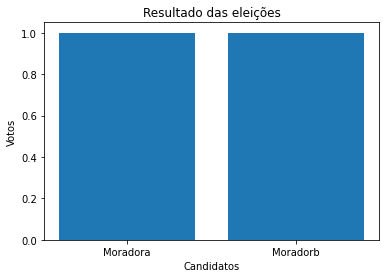

In [6]:
sistema()

## Dicas

* Métodos mágicos: no mínimo uma _representação imprimível_ dos objetos de cada classe seria desejável para facilitar a sua vida. No caso de um morador, podemos imprimir seu nome e número do apartamento. No caso de um candidato, poderíamos incluir o número da urna. No caso do apartamento, seria legal imprimir todos os moradores. E no caso da urna, podemos ter dois casos: antes da votação acabar, apenas a lista de apartamentos que já votou deveria ser impressa. Após o término da votação, ela deveria imprimir quantos votos cada candidato recebeu e qual deles venceu.

* Arquivos e testes: note que vocês sempre foram orientados a passar dados por parâmetros **ou** digitá-los. Se você bolar um esquema inteligente com arquivos em formato padronizado (como CSV) e organizar direitinho seu programa principal, você consegue gerar um único arquivo com todos os moradores e suas respectivas informações (número do apartamento, se é ou não candidato e em quem gostaria de votar) e automatizar completamente as etapas do seu programa.

* Segurança adicional: atualmente, cada apartamento armazena a informação se já votou ou não. Mas e se o apartamento pudesse alterar essa informação e enganar a urna? Você pode colocar uma camada redundante de segurança fazendo com que a urna TAMBÉM controle quais apartamentos já votaram. Mesmo que o apartamento diga que não votou, se a urna está registrando que ele votou, então um hipotético segundo voto deve ser recusado. Veja se consegue pensar em outras possíveis falhas de segurança em potencial no programa. Lembre-se sempre de pensar do ponto de vista de uma classe e "desconfiar" das outras.

* Criatividade: os enunciados trazem o **mínimo** que você precisa fazer para que o seu programa funcione como foi planejado. Isso não impede que você crie outros métodos, acrescente informações que possam ser úteis e até mesmo crie outras classes para modelar melhor outros fatores que poderiam ser considerados na organização da sua eleição.


## Bônus: representação visual dos votos

A função abaixo gera um gráfico de barras mostrando quantos votos cada candidato teve! Cole-a em sua classe Urna e faça os devidos ajustes para que ela use os atributos da Urna ao invés dos parâmetros utilizados. 

O programinha na célula seguinte apenas ilustra o funcionamento da função.


In [7]:
import matplotlib.pyplot as plt

def graficoVotos(candidatos, votos):
    plt.bar(candidatos, votos)
    plt.title('Resultado das eleições')
    plt.xlabel('Candidatos')
    plt.ylabel('Votos')
    

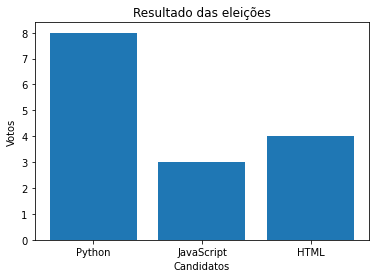

In [8]:
candidatos = ['Python', 'JavaScript', 'HTML']
votos = [8, 3, 4]

graficoVotos(candidatos, votos)

In [9]:
class Morador:
    def __init__(self, nome, apto):
        self.nome = nome
        self.apto = apto